<a href="https://colab.research.google.com/github/luasmar/luasmar/blob/main/Estudoidh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import requests

import pandas as pd

districts = requests.get("https://servicodados.ibge.gov.br/api/v1/localidades/estados/35/municipios").json()

districts_sp = [municipios["nome"] for municipios in districts]
districts_id = [municipios["id"] for municipios in districts]

data_sp = pd.DataFrame.from_dict({'ID':districts_id,'Municípios':districts_sp})

data_sp

# Pegamos da url somente os ids e os nomes dos municípios do estado de SP no site do IBGE.  





,ID,Municípios
0,3500105,Adamantina
1,3500204,Adolfo
2,3500303,Aguaí
3,3500402,Águas da Prata
4,3500501,Águas de Lindóia
...,...,...
640,3557006,Votorantim
641,3557105,Votuporanga
642,3557154,Zacarias
643,3557204,Chavantes


In [39]:
url="https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html"
d = pd.read_html(url)
idh = d[0]
idh

# Extraímos da url acima a tabela do idh do brasil de outra fonte de dados. 

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,1 º,São Caetano do Sul (SP),862,0891,0887,811
1,2 º,Águas de São Pedro (SP),854,0849,0890,825
2,3 º,Florianópolis (SC),847,0870,0873,800
3,4 º,Balneário Camboriú (SC),845,0854,0894,789
4,4 º,Vitória (ES),845,0876,0855,805
...,...,...,...,...,...,...
5560,5560 º,Uiramutã (RR),453,0439,0766,276
5561,5562 º,Marajá do Sena (MA),452,0400,0774,299
5562,5563 º,Atalaia do Norte (AM),450,0481,0733,259
5563,5564 º,Fernando Falcão (MA),443,0417,0728,286


In [40]:
print(idh.columns.ravel())
idh['Município'] = idh['Município'].str[:-5]
idh

# Removemos da coluna Município a str referente ao estado, para que possamos comparare unir as duas fontes de informação. 

['Ranking IDHM 2010' 'Município' 'IDHM 2010' 'IDHM Renda 2010'
 'IDHM Longevidade 2010' 'IDHM Educação 2010']


,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,1 º,São Caetano do Sul,862,0891,0887,811
1,2 º,Águas de São Pedro,854,0849,0890,825
2,3 º,Florianópolis,847,0870,0873,800
3,4 º,Balneário Camboriú,845,0854,0894,789
4,4 º,Vitória,845,0876,0855,805
...,...,...,...,...,...,...
5560,5560 º,Uiramutã,453,0439,0766,276
5561,5562 º,Marajá do Sena,452,0400,0774,299
5562,5563 º,Atalaia do Norte,450,0481,0733,259
5563,5564 º,Fernando Falcão,443,0417,0728,286


In [41]:
final_data = pd.merge(left = data_sp, right = idh, left_on = 'Municípios', right_on = 'Município', how = "outer")

final_data

# juntamos as duas bases de dados

,ID,Municípios,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,3500105.0,Adamantina,67 º,Adamantina,790.0,0772,0852,750.0
1,3500204.0,Adolfo,1021 º,Adolfo,730.0,0710,0844,648.0
2,3500303.0,Aguaí,1454 º,Aguaí,715.0,0703,0858,606.0
3,3500402.0,Águas da Prata,119 º,Águas da Prata,781.0,0750,0886,716.0
4,3500501.0,Águas de Lindóia,648 º,Águas de Lindóia,745.0,0725,0846,675.0
...,...,...,...,...,...,...,...,...
5573,NaN,NaN,5560 º,Uiramutã,453.0,0439,0766,276.0
5574,NaN,NaN,5562 º,Marajá do Sena,452.0,0400,0774,299.0
5575,NaN,NaN,5563 º,Atalaia do Norte,450.0,0481,0733,259.0
5576,NaN,NaN,5564 º,Fernando Falcão,443.0,0417,0728,286.0


In [42]:
dfinal = final_data.dropna()
dfinal

# Excluímos as linhas que com "Nan". São linhas que não tem relaçao com a fonte do IBGE

,ID,Municípios,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,3500105.0,Adamantina,67 º,Adamantina,790.0,0772,0852,750.0
1,3500204.0,Adolfo,1021 º,Adolfo,730.0,0710,0844,648.0
2,3500303.0,Aguaí,1454 º,Aguaí,715.0,0703,0858,606.0
3,3500402.0,Águas da Prata,119 º,Águas da Prata,781.0,0750,0886,716.0
4,3500501.0,Águas de Lindóia,648 º,Águas de Lindóia,745.0,0725,0846,675.0
...,...,...,...,...,...,...,...,...
694,3557006.0,Votorantim,265 º,Votorantim,767.0,0720,0838,747.0
695,3557105.0,Votuporanga,67 º,Votuporanga,790.0,0772,0857,744.0
696,3557154.0,Zacarias,1052 º,Zacarias,729.0,0695,0826,674.0
697,3557204.0,Chavantes,1052 º,Chavantes,729.0,0713,0828,655.0


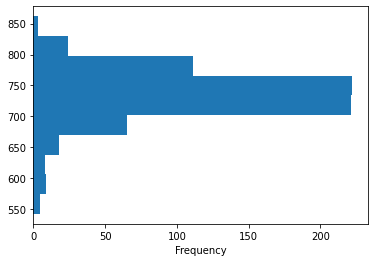

In [37]:
dfinal['IDHM 2010'].plot.hist(orientation="horizontal", cumulative=False)

# Geramos um simples gráfico de hist para acompanharmos a quantidade de municípios e seus Idh's